In [15]:
import pandas as pd
from sklearn import svm

path = 'datasets/drug_consumption_engineered.csv'
dataset_D = pd.read_csv(path)

dataset_D.head()

,ID,Age,Gender,Education,Countery,Ethnicity,NScore,EScore,OScore,AScore,...,Cannabis,Cannabis_Consume,Choc,Choc_Consume,Ecstasy,Ecstasy_Consume,Nicotine,Nicotine_Consume,VSA,VSA_Consume
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,0,CL5,1,CL0,0,CL2,1,CL0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,1,CL6,1,CL4,1,CL4,1,CL0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL3,1,CL4,1,CL0,0,CL0,0,CL0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL2,1,CL4,1,CL0,0,CL2,1,CL0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL3,1,CL6,1,CL1,0,CL2,1,CL0,0


In [16]:

selected_feature_columns = ['Gender', 'Education', 'Ethnicity', 'NScore', 'EScore', 'OScore', 'AScore', 'CScore', 'Impulsive']
selected_feature = dataset_D.loc[:, selected_feature_columns]
selected_feature.head()

,Gender,Education,Ethnicity,NScore,EScore,OScore,AScore,CScore,Impulsive
0,0.48246,-0.05921,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712
1,-0.48246,1.98437,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126
2,-0.48246,-0.05921,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983
3,0.48246,1.16365,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983
4,0.48246,1.98437,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712


In [17]:
selected_target = dataset_D.Cannabis_Consume
selected_target.head()

0    0
1    1
2    1
3    1
4    1
Name: Cannabis_Consume, dtype: int64

In [18]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn import preprocessing

db1_kfold = dataset_D.copy(deep=True)
selected_feature = db1_kfold.loc[:, selected_feature_columns]
selected_target = db1_kfold.Cannabis_Consume

preprocessing.MinMaxScaler()
selected_feature = preprocessing.MinMaxScaler().fit_transform(selected_feature)

from sklearn import tree 
dt_classifer_os = tree.DecisionTreeClassifier()

k_fold_cv_os = KFold(n_splits=10)
smote_os = SMOTE()

dt_scores_os_recall = []
dt_scores_os_precison = []
results_os = pd.DataFrame()

for train_index, test_index in k_fold_cv_os.split(selected_feature, selected_target):
    train_selected_feature_fold, train_selected_target_fold = selected_feature[train_index], selected_target[train_index]
    test_selected_feature_fold, test_selected_target_fold = selected_feature[test_index], selected_target[test_index]

    train_selected_feature_os, train_selected_target_os = smote_os.fit_resample(train_selected_feature_fold, train_selected_target_fold)

    dt_model_os = dt_classifer_os.fit(train_selected_feature_os, train_selected_target_os)
    
    dt_scores_os_recall.append(metrics.recall_score(test_selected_target_fold, dt_model_os.predict(test_selected_feature_fold), pos_label=0))
    dt_scores_os_precison.append(metrics.precision_score(test_selected_target_fold, dt_model_os.predict(test_selected_feature_fold), pos_label=0))

results_os["dt_scores_os_recall"] = dt_scores_os_recall
results_os["dt_scores_os_precison"] = dt_scores_os_precison


In [19]:
from sklearn.tree import export_text

decision_text = export_text(dt_classifer_os, feature_names=selected_feature_columns)

print(decision_text)

|--- OScore <= 0.53
|   |--- CScore <= 0.44
|   |   |--- Education <= 0.43
|   |   |   |--- OScore <= 0.27
|   |   |   |   |--- Impulsive <= 0.67
|   |   |   |   |   |--- AScore <= 0.73
|   |   |   |   |   |   |--- EScore <= 0.15
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- EScore >  0.15
|   |   |   |   |   |   |   |--- OScore <= 0.25
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- OScore >  0.25
|   |   |   |   |   |   |   |   |--- AScore <= 0.48
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- AScore >  0.48
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- AScore >  0.73
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Impulsive >  0.67
|   |   |   |   |   |--- class: 1
|   |   |   |--- OScore >  0.27
|   |   |   |   |--- AScore <= 0.67
|   |   |   |   |   |--- AScore <= 0.47
|   |   |   |   |   |   |--- Impulsive <= 0.28
|   |   |   |   |   |   |   |---

[Text(0.45434182787698413, 0.975, 'OScore <= 0.527\ngini = 0.5\nsamples = 2242\nvalue = [1121, 1121]'),
 Text(0.21949921461640212, 0.925, 'CScore <= 0.442\ngini = 0.454\nsamples = 1185\nvalue = [773, 412]'),
 Text(0.06889674272486772, 0.875, 'Education <= 0.434\ngini = 0.48\nsamples = 323\nvalue = [129, 194]'),
 Text(0.022817460317460316, 0.825, 'OScore <= 0.274\ngini = 0.342\nsamples = 137\nvalue = [30, 107]'),
 Text(0.010582010582010581, 0.775, 'Impulsive <= 0.667\ngini = 0.413\nsamples = 24\nvalue = [17, 7]'),
 Text(0.007936507936507936, 0.725, 'AScore <= 0.726\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.005291005291005291, 0.675, 'EScore <= 0.154\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.0026455026455026454, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.007936507936507936, 0.625, 'OScore <= 0.255\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.005291005291005291, 0.575, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.010582010582

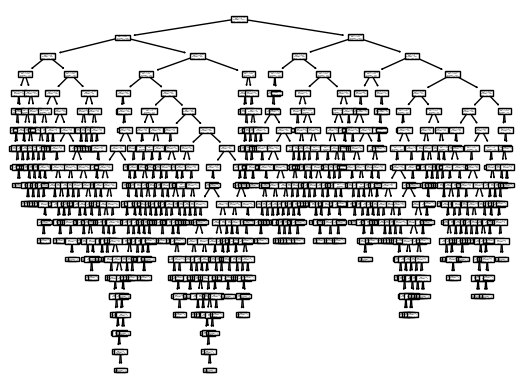

In [20]:
from sklearn import tree

tree.plot_tree(dt_classifer_os, feature_names=selected_feature_columns)

0.5193600646870562
0.46988179288430365


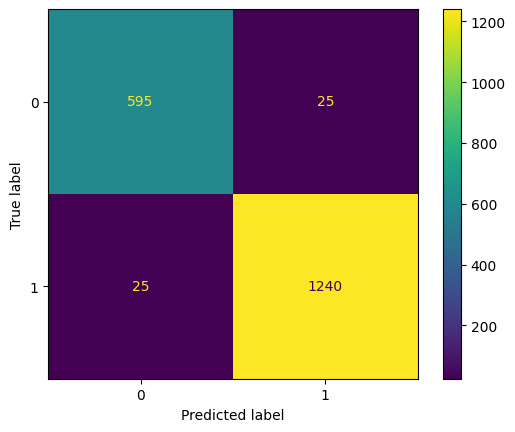

In [21]:
from sklearn import metrics

print(results_os["dt_scores_os_recall"].mean())
print(results_os["dt_scores_os_precison"].mean())
metrics.ConfusionMatrixDisplay.from_estimator(dt_classifer_os, selected_feature, selected_target)
